In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


1. Загрузите файл HR.csv в pandas dataframe

In [ ]:
df = pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.


In [ ]:
df_filter = df.iloc[:,[0,1,2,3,4,5,6,7]]
corr = df_filter.corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Вывод:
Две самые скоррелированные: satisfaction_level и left (-0.388375, отрицательная корреляция)
Две наименее скоррелированные переменные: time_spend_company и Work_accident (0.002120)

4. Рассчитайте сколько сотрудников работает в каждом
департаменте

In [ ]:
df_bydep = df.groupby('department').size()
print(df_bydep)
#print(df_bydep.sum())

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


5. Показать распределение сотрудников по зарплатам.

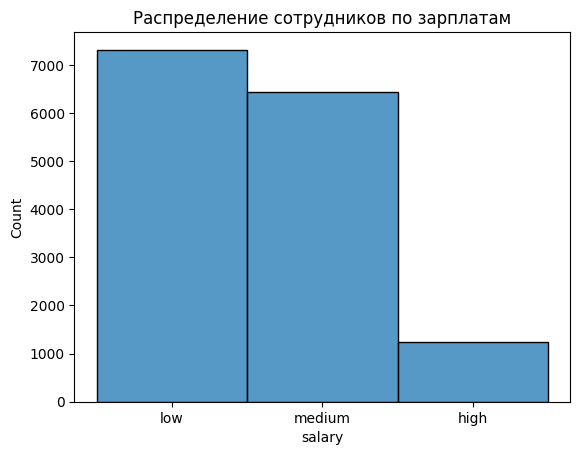

In [ ]:
sns.histplot(df.salary)
plt.title('Распределение сотрудников по зарплатам')
plt.show()

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.


In [ ]:
df_salarybydep = df.groupby([df['department'],df['salary']])[['salary']].size()
df_salarybydep

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
dtype: int64

<Axes: ylabel='department,salary'>

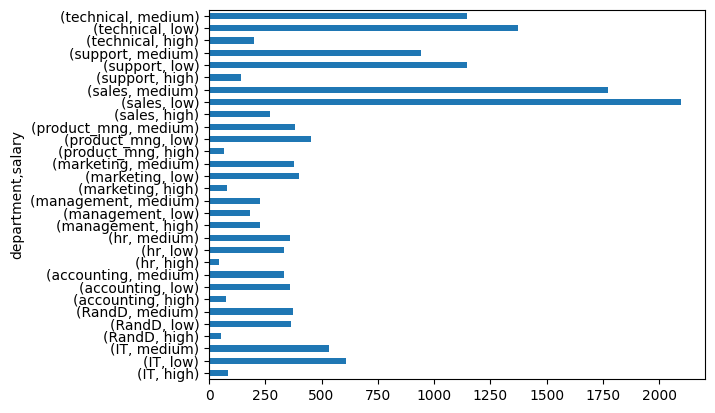

In [ ]:
df_salarybydep.plot(kind="barh")

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом


In [ ]:
df_high = list(df.loc[df['salary'] == 'high']['average_montly_hours'])
df_low = list(df.loc[df['salary'] == 'low']['average_montly_hours'])

In [ ]:
#Для проверки нормальности используем W-критерий Шапиро-Уилка, который обычно предпочтительнее для небольших выборок.
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [ ]:
# проверка нормальности:
check_normality(df_high)
check_normality(df_low)

p value:0.0000
Отклоняем нулевую гипотезу >> Данные распределены не нормально
p value:0.0000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


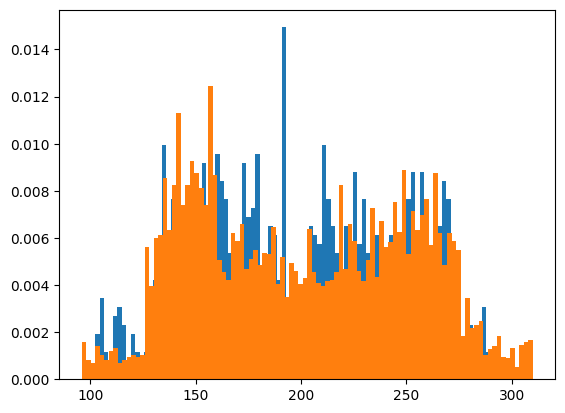

In [ ]:
#доп. визуально посмотреть нормальность распределения
plt.hist(df_high, bins=100, density=True);
plt.hist(df_low, bins=100, density=True);

In [ ]:
#используем непараметрический тест Манна-Уитни
stat, p = stats.mannwhitneyu(df_high, df_low)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые, нет разницы между проведенным на работе временем для сотрудников с низким и высоким окладом')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются, есть разница между проведенным на работе временем для сотрудников с низким и высоким окладом')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые, нет разницы между проведенным на работе временем для сотрудников с низким и высоким окладом


8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов


In [ ]:
df_left = df.loc[df['left'] == 1]

In [ ]:
#Доля уволившихся сотрудников с повышением за последние 5 лет
len(df_left.loc[df_left['promotion_last_5years'] == 1])/len(df_left)

0.005320638476617194

In [ ]:
#Средняя степень удовлетворенности уволившихся сотрудников
df_left['satisfaction_level'].mean()

0.4400980117614114

In [ ]:
# Среднее количество проектов уволившихся сотрудников
df_left['number_project'].mean()

3.8555026603192384

In [ ]:
df_noleft = df.loc[df['left'] != 1]

In [ ]:
#Доля неуволившихся сотрудников с повышением за последние 5 лет
len(df_noleft.loc[df_noleft['promotion_last_5years'] == 1])/len(df_noleft)

0.026251312565628283

In [ ]:
#Средняя степень удовлетворенности неуволившихся сотрудников
df_noleft['satisfaction_level'].mean()

0.666809590479524

In [ ]:
# Среднее количество проектов неуволившихся сотрудников
df_noleft['number_project'].mean()

3.786664333216661

9.  Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [ ]:
left = pd.array(df['left'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, test_size=0.20)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,1,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7666666666666667

In [ ]:
# Оцениваем качество, при помощи метода mean_squared_error для тестовой выборки
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, lda.predict(X_test))

0.23333333333333334

In [ ]:
mean_squared_error(y_train, lda.predict(X_train))

0.23918659888324026

СКО тестовой и обучающейся моделей примерно равны, качество обучающейся модели - хорошее

10. Загрузить jupyter notebook с решение на github и прислать ссылку